In [1]:
import pandas as pd
import seaborn as sn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import LSTM,Activation,Dropout
from sklearn.metrics import mean_squared_error

In [2]:
from matplotlib import pyplot
import numpy as np

In [3]:
df=pd.read_csv("weatherHistory.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  int64  
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB


In [5]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [6]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [7]:
df=df.drop(['Daily Summary'],axis=1)

In [8]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
dtype: int64

In [9]:
df.rename(columns={'Precip Type':'PrecipType'},inplace=True)

In [10]:
df.PrecipType[df.PrecipType == 'rain'] = 0
df.PrecipType[df.PrecipType == 'snow'] = 1

C:\Users\roymi\AppData\Local\Temp\ipykernel_16924\3815843579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.PrecipType[df.PrecipType == 'rain'] = 0
C:\Users\roymi\AppData\Local\Temp\ipykernel_16924\3815843579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.PrecipType[df.PrecipType == 'snow'] = 1


In [11]:
df.isnull().sum()

Formatted Date                0
Summary                       0
PrecipType                  517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
dtype: int64

In [12]:
df.head()

,Formatted Date,Summary,PrecipType,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,0,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,0,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,0,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,0,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,0,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51


In [13]:
df.fillna(0,inplace=True)

In [14]:
df.isnull().sum()

Formatted Date              0
Summary                     0
PrecipType                  0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

In [15]:
df.rename(columns={"Temperature (C)":"Temperature","Wind Speed (km/h)":"WindSpeed","Wind Bearing (degrees)":"WindBearings","Visibility (km)":"Visibilty","Loud Cover":"LoudCover","Pressure (millibars)":"Pressure","Apparent Temperature (C)":"ApparentTemperature"},inplace=True)

In [16]:
df.head()

,Formatted Date,Summary,PrecipType,Temperature,ApparentTemperature,Humidity,WindSpeed,WindBearings,Visibilty,LoudCover,Pressure
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,0,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,0,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,0,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,0,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,0,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51


In [17]:
df.Summary.unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [18]:
df.LoudCover.unique()

array([0], dtype=int64)

In [19]:
df.corr()

C:\Users\roymi\AppData\Local\Temp\ipykernel_16924\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PrecipType,Temperature,ApparentTemperature,Humidity,WindSpeed,WindBearings,Visibilty,LoudCover,Pressure
PrecipType,1.000000,-0.562620,-0.565207,0.232113,-0.067928,-0.041984,-0.312875,NaN,0.009008
Temperature,-0.562620,1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
ApparentTemperature,-0.565207,0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,0.232113,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
WindSpeed,-0.067928,0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
WindBearings,-0.041984,0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibilty,-0.312875,0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
LoudCover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure,0.009008,-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


In [20]:
df=df.drop(['LoudCover'],axis=1)

C:\Users\roymi\AppData\Local\Temp\ipykernel_16924\221754715.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr())


<Axes: >

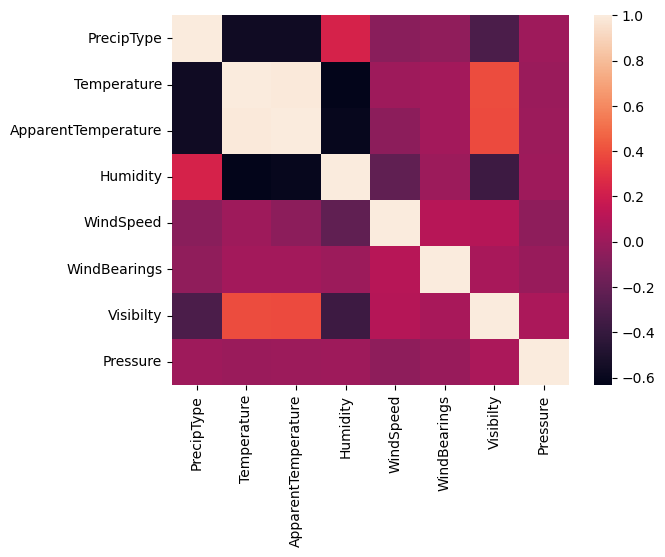

In [21]:
sn.heatmap(df.corr())

In [22]:
print(len(df.Summary.unique()))
df.Summary.unique()

27


array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
df.Summary[:] = labelencoder_X.fit_transform(df.Summary[:])

C:\Users\roymi\AppData\Local\Temp\ipykernel_16924\743693678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Summary[:] = labelencoder_X.fit_transform(df.Summary[:])


In [24]:
df.Summary.unique()

array([19, 17, 18, 12, 3, 6, 5, 4, 13, 15, 23, 25, 2, 26, 0, 11, 24, 7, 9,
       21, 14, 16, 8, 22, 10, 1, 20], dtype=object)

In [25]:
print(len(df.Summary.unique()))

27


In [26]:
df.head()

,Formatted Date,Summary,PrecipType,Temperature,ApparentTemperature,Humidity,WindSpeed,WindBearings,Visibilty,Pressure
0,2006-04-01 00:00:00.000 +0200,19,0,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,2006-04-01 01:00:00.000 +0200,19,0,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,2006-04-01 02:00:00.000 +0200,17,0,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,2006-04-01 03:00:00.000 +0200,19,0,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,2006-04-01 04:00:00.000 +0200,17,0,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51


In [27]:
# converting series to supervised learning 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True): 
    n_vars = 1 if type(data) is list else data.shape[1] 
    df = pd.DataFrame(data) 
    cols, names = list(), list() 
    # input sequence (t-n, ... t-1) 
    for i in range(n_in, 0, -1):  
        cols.append(df.shift(i))  
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)] 
    # forecast sequence (t, t+1, ... t+n) 
    for i in range(0, n_out):  
        cols.append(df.shift(-i))  
        if i == 0:   
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]  
        else:   
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)] 
    # put it all together 
    agg = pd.concat(cols, axis=1) 
    agg.columns = names 
    # drop rows with NaN values 
    if dropnan:  
        agg.dropna(inplace=True) 
    return agg 

In [29]:
df=df.drop('Formatted Date',axis=1)

In [30]:
df.index.name='date'

In [31]:
df.head()

,Summary,PrecipType,Temperature,ApparentTemperature,Humidity,WindSpeed,WindBearings,Visibilty,Pressure
date,,,,,,,,,
0,19,0,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,19,0,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,17,0,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,19,0,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,17,0,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51


In [32]:
df=df.drop('ApparentTemperature',axis=1)

In [33]:
df.to_csv("weather.csv")

In [34]:
df.head()

,Summary,PrecipType,Temperature,Humidity,WindSpeed,WindBearings,Visibilty,Pressure
date,,,,,,,,
0,19,0,9.472222,0.89,14.1197,251,15.8263,1015.13
1,19,0,9.355556,0.86,14.2646,259,15.8263,1015.63
2,17,0,9.377778,0.89,3.9284,204,14.9569,1015.94
3,19,0,8.288889,0.83,14.1036,269,15.8263,1016.41
4,17,0,8.755556,0.83,11.0446,259,15.8263,1016.51


In [35]:
data=df.values
print(df.Temperature.min())
df.Temperature.max()

-21.82222222


39.90555556

In [36]:
data=data.astype('float32')

In [37]:
# normalize features
scaler=MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(data)

In [38]:
# specify deay time & no. of features
n_hours = 3
n_features = 8

In [39]:
# frame as supervised learning
reframed = series_to_supervised(scaled,n_hours,1)
print(reframed.shape)

(96450, 32)


In [40]:
print(reframed)

       var1(t-3)  var2(t-3)  var3(t-3)  var4(t-3)  var5(t-3)  var6(t-3)  \
3       0.730769        0.0   0.506975       0.89   0.221130   0.699164   
4       0.730769        0.0   0.505085       0.86   0.223399   0.721448   
5       0.653846        0.0   0.505445       0.89   0.061523   0.568245   
6       0.730769        0.0   0.487805       0.83   0.220877   0.749304   
7       0.653846        0.0   0.495365       0.83   0.172970   0.721448   
...          ...        ...        ...        ...        ...        ...   
96448   0.730769        0.0   0.857079       0.28   0.217600   0.111421   
96449   0.730769        0.0   0.851949       0.28   0.222642   0.066852   
96450   0.730769        0.0   0.820718       0.32   0.191125   0.058496   
96451   0.730769        0.0   0.774998       0.43   0.172214   0.086351   
96452   0.730769        0.0   0.751778       0.48   0.158094   0.055710   

       var7(t-3)  var8(t-3)  var1(t-2)  var2(t-2)  ...  var7(t-1)  var8(t-1)  \
3          0.983   

In [41]:
values = reframed.values

In [42]:
n_train_hours=365*24

In [43]:
train = values[:n_train_hours,:]
test = values[n_train_hours:, : ]

In [44]:
# split into input and outputs
n_obs = n_hours * n_features
train_X,train_Y = train[:,:n_obs],train[:,-6]   # as at 6th no. from last is temp
test_X,test_Y = test[:,:n_obs],test[:,-6]

In [45]:
print(test_Y)

[0.5386554  0.53757536 0.5223652  ... 0.7105571  0.70218706 0.68463683]


In [46]:
print(train_X.shape,len(train_X),train_Y.shape)

(8760, 24) 8760 (8760,)


In [47]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0],n_hours,n_features))
test_X = test_X.reshape((test_X.shape[0],n_hours,n_features))  # 24 = 3 * 8
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(8760, 3, 8) (8760,) (87690, 3, 8) (87690,)


In [48]:
hidden_nodes = int(2/3 * (train_X.shape[1] * train_X.shape[2]))
print(hidden_nodes)

16


In [49]:
# network design
model = Sequential()
model.add(LSTM(30, input_shape=(train_X.shape[1], train_X.shape[2])))    # input_shape=(no. of i/p, dimension), result=(1,50)
# test
model.add(Dense(256,name='FC1'))  #256
model.add(Activation('relu'))
model.add(Dropout(0.2))
# end
model.add(Dense(1,name='out_layer'))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['mean_squared_error'])

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30)                4680      
                                                                 
 FC1 (Dense)                 (None, 256)               7936      
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257       
                                                                 
Total params: 12,873
Trainable params: 12,873
Non-trainable params: 0
_________________________________________________________________


In [51]:
# fit network
history = model.fit(train_X, train_Y, epochs=100, batch_size=128, validation_data=(test_X, test_Y), verbose=2, shuffle=False)  #, verbose=2, shuffle=False

Epoch 1/100
69/69 - 5s - loss: 0.0467 - mean_squared_error: 0.0467 - val_loss: 0.0116 - val_mean_squared_error: 0.0116 - 5s/epoch - 69ms/step
Epoch 2/100
69/69 - 1s - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0096 - val_mean_squared_error: 0.0096 - 1s/epoch - 21ms/step
Epoch 3/100
69/69 - 1s - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0083 - val_mean_squared_error: 0.0083 - 1s/epoch - 21ms/step
Epoch 4/100
69/69 - 1s - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0081 - val_mean_squared_error: 0.0081 - 1s/epoch - 21ms/step
Epoch 5/100
69/69 - 2s - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - 2s/epoch - 24ms/step
Epoch 6/100
69/69 - 1s - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0063 - val_mean_squared_error: 0.0063 - 1s/epoch - 21ms/step
Epoch 7/100
69/69 - 2s - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0042 - val_mean_squared_error: 0.0042 - 2s/epoch - 28ms/step
Epoch 

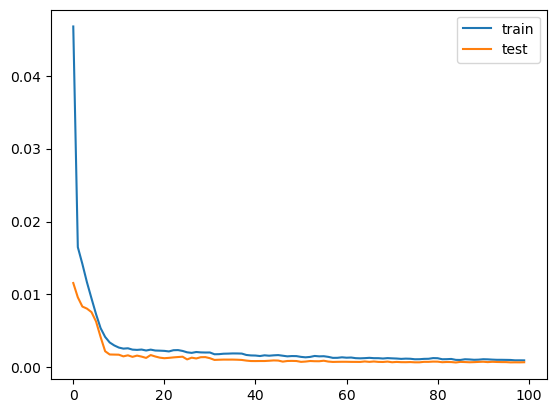

In [52]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [53]:
# prediction
test_Y_predicted = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))

2741/2741 [==============================] - 4s 1ms/step


In [54]:
print(test_Y_predicted)
print(test_Y)

[[0.47816092]
 [0.53498995]
 [0.54204065]
 ...
 [0.69996756]
 [0.6663188 ]
 [0.66511464]]
[0.5386554  0.53757536 0.5223652  ... 0.7105571  0.70218706 0.68463683]


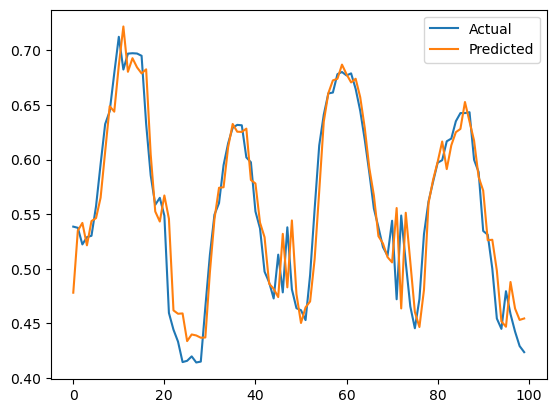

In [55]:
pyplot.plot(test_Y[:100],label="Actual")
pyplot.plot(test_Y_predicted[:100],label="Predicted")
pyplot.legend()

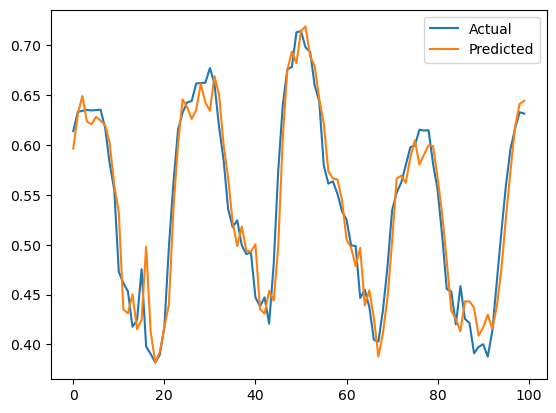

In [56]:
pyplot.plot(test_Y[200:300],label="Actual")
pyplot.plot(test_Y_predicted[200:300],label="Predicted")
pyplot.legend()

In [57]:
# invert scaling for forecast
vir_array= np.concatenate((test_X[:,-8:-6],test_Y_predicted),axis=1)
inv_test_Y_predicted = np.concatenate((vir_array,test_X[:,-5:]),axis=1)
inv_test_Y_predicted = scaler.inverse_transform(inv_test_Y_predicted)
inv_test_Y_predicted = inv_test_Y_predicted[:,2]
print(inv_test_Y_predicted)

[ 7.6935873 11.201517  11.636741  ... 21.385218  19.308153  19.233826 ]


In [58]:
# invert scaling for actual
test_Y = test_Y.reshape((len(test_Y), 1))
vir_array2= np.concatenate((test_X[:,-8:-6],test_Y),axis=1)
inv_test_Y = np.concatenate((vir_array2,test_X[:,-5:]),axis=1)
inv_test_Y = scaler.inverse_transform(inv_test_Y)
inv_test_Y = inv_test_Y[:,2]
print(inv_test_Y)

[11.427777 11.361109 10.42222  ... 22.038887 21.522223 20.438887]


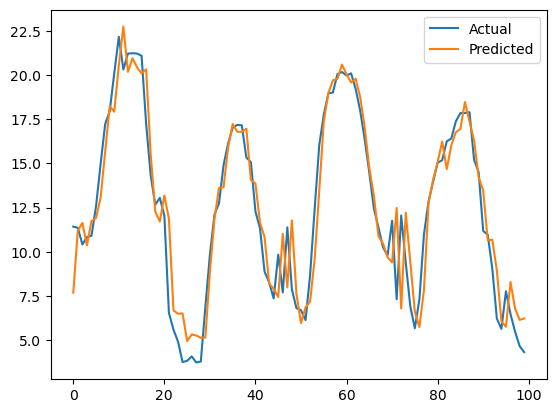

In [59]:
pyplot.plot(inv_test_Y[:100],label="Actual")
pyplot.plot(inv_test_Y_predicted[:100],label="Predicted")
pyplot.legend()

In [60]:
# RMSE
from math import sqrt
rmse = sqrt(mean_squared_error(inv_test_Y, inv_test_Y_predicted))
print('Test RMSE: %.3f' % rmse) 

Test RMSE: 1.648


In [61]:
# comparing actual and predicted temp using data of the previous 3 hours
df_result=pd.DataFrame({'Actual_Temperature':inv_test_Y,'Predicted_Temperature':inv_test_Y_predicted})

In [62]:
df_result.head()

,Actual_Temperature,Predicted_Temperature
0,11.427777,7.693587
1,11.361109,11.201517
2,10.422220,11.636741
3,10.833334,10.370688
4,10.911113,11.742410


In [63]:
df_result.to_csv("weather_result.csv")